In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
os.getcwd()

'/home/sc.uni-leipzig.de/me792rqay/development/confluence/notebooks'

In [3]:
std_path = "../../confluence-results/final-results/R1/AGGREGATED_RESTULTS/cp-lc-internal/meta_std_al_vs_rand.csv"
mean_path = "../../confluence-results/final-results/R1/AGGREGATED_RESTULTS/cp-lc-internal/meta_mean_al_vs_rand.csv"
df_mean = pd.read_csv(mean_path, index_col=0)
df_std= pd.read_csv(std_path, index_col=0)

In [4]:
merged_df = pd.merge(df_mean, df_std, on=["step", "method"], suffixes=["_mean", "_std"])

NameError: name 'df_merged' is not defined

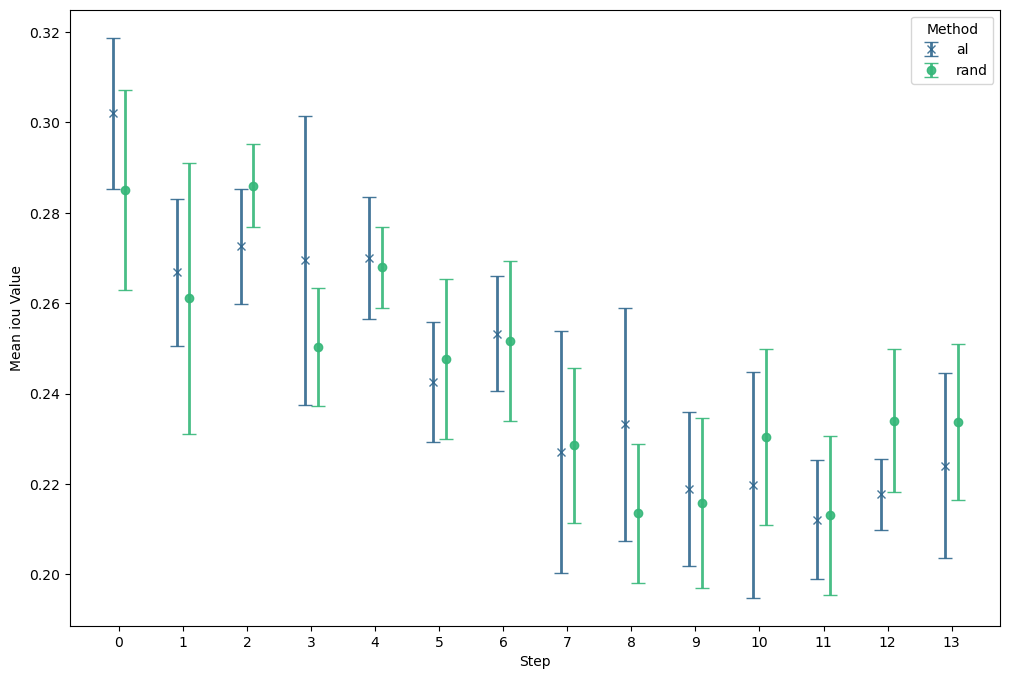

In [6]:
import numpy as np
metrics = ["iou"]
for metric in metrics:
    plt.figure(figsize=(12, 8))

    # Calculate unique steps and methods
    steps = merged_df['step'].unique()
    methods = merged_df['method'].unique()

    # Assign colors to each method
    palette = sns.color_palette("viridis", len(methods))

    # Create a plot
    for i, method in enumerate(methods):
        df_method = merged_df[merged_df['method'] == method]
        offsets = np.linspace(-0.1, 0.1, len(methods))
        marker = "o"
        if method == "al":
            marker = "x"
        for j, step in enumerate(steps):
            x_offset = step + offsets[i]
            y_mean = df_method[df_method['step'] == step][f"{metric}_mean"].values[0]
            y_std = df_method[df_method['step'] == step][f"{metric}_std"].values[0]
            
            plt.errorbar(
                x_offset, y_mean,
                yerr=y_std,
                fmt=marker,
                color=palette[i],
                elinewidth=2,
                capsize=5,
                alpha=0.9,
                label=f'{method}' if j == 0 else ""
            )

    # Customize the plot
    plt.xlabel("Step")
    plt.ylabel(f"Mean {metric} Value")
    plt.xticks(steps)  # Set x-ticks to steps
    plt.legend(title="Method", loc='best')

In [34]:
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')

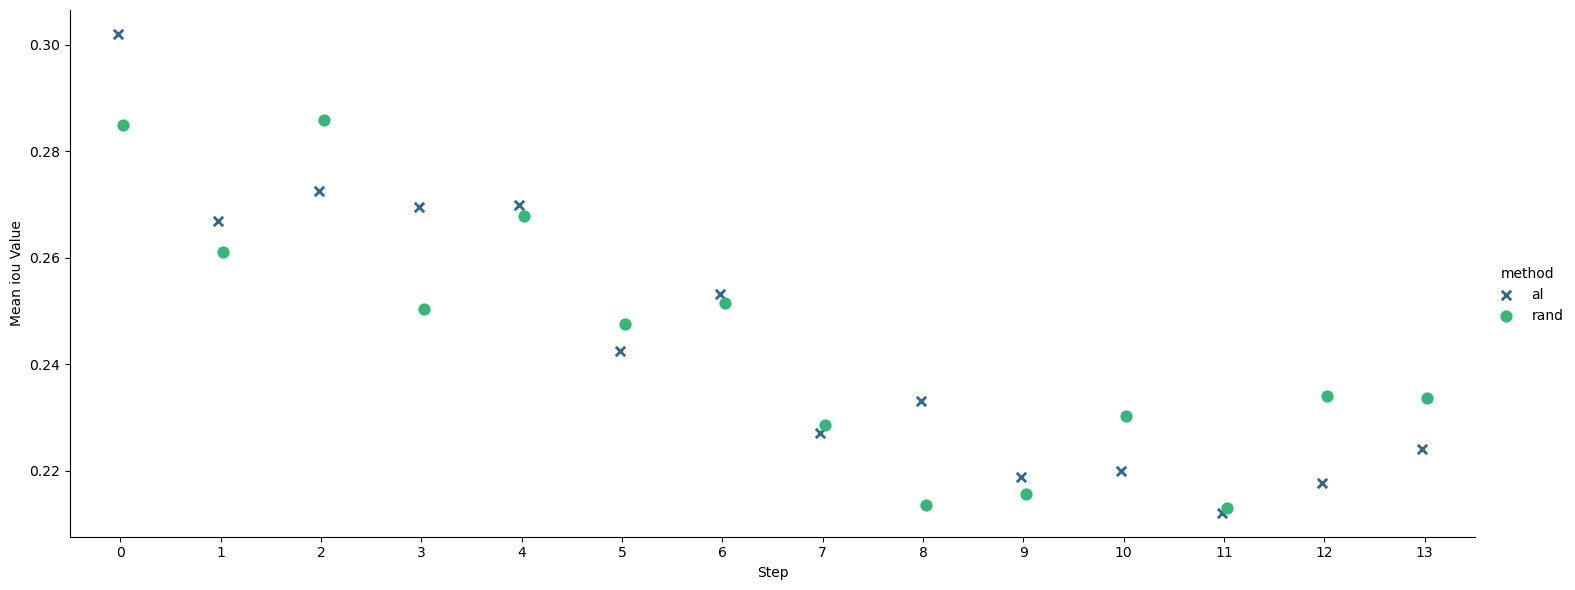

In [35]:
plt.show()

In [31]:
for ax in g.axes.flat:
    print(ax)

AxesSubplot(0.0502789,0.0971296;0.887888x0.87787)


In [14]:
import numpy as np
arr = np.load("../../confluence-results/final-results/R1/AGGREGATED_RESTULTS/cp-lc-internal/aggregated_al_ran.npy")
print(arr.shape)

(28, 12, 10)


In [7]:
import pickle
movie_path = "../../confluence-results/final-results/R1/AGGREGATED_RESTULTS/sam-sc/movie_plot_data.pkl"
with open(movie_path, "rb") as f:
    al_data, rand_data = pickle.load(f)

In [8]:
[len(v) for k,v in al_data.items()]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 9]

In [9]:
al_data

{2: [161.5, 17.5, 138.0, 43.5, 84.5, 78.0, 43.5, 68.5, 81.5, 201.0],
 3: [61.0, 61.0, 32.0, 11.0, 128.0, 128.0, 11.0, 61.0, 61.0, 61.0],
 4: [67.0, 117.0, 61.0, 89.0, 11.0, 61.0, 117.0, 56.0, 67.0, 56.0],
 5: [99.0, 89.0, 117.0, 206.0, 88.0, 56.0, 29.0, 32.0, 99.0, 88.0],
 6: [49.0, 128.0, 9.0, 29.0, 96.0, 88.0, 56.0, 43.0, 88.0, 99.0],
 7: [7.0, 7.0, 30.0, 49.0, 81.0, 177.0, 121.0, 78.0, 99.0, 50.0],
 8: [40.0, 40.0, 47.0, 47.0, 121.0, 128.0, 81.0, 128.0, 10.0, 47.0],
 9: [17.0, 17.0, 40.0, 40.0, 7.0, 47.0, 47.0, 47.0, 98.0, 17.0],
 10: [108.0, 108.0, 111.0, 111.0, 118.0, 17.0, 118.0, 71.0, 17.0, 23.0],
 11: [20.0, 20.0, 20.0, 20.0, 23.0, 20.0, 20.0, 71.0, 131.0]}

In [10]:
[len(v) for k,v in rand_data.items()]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 9]

<ErrorbarContainer object of 3 artists>

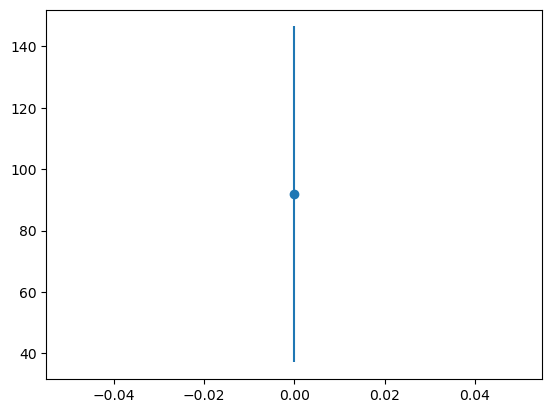

In [11]:
plt.errorbar(0, np.mean(al_data[2]),yerr=np.std(al_data[2]), fmt="o")

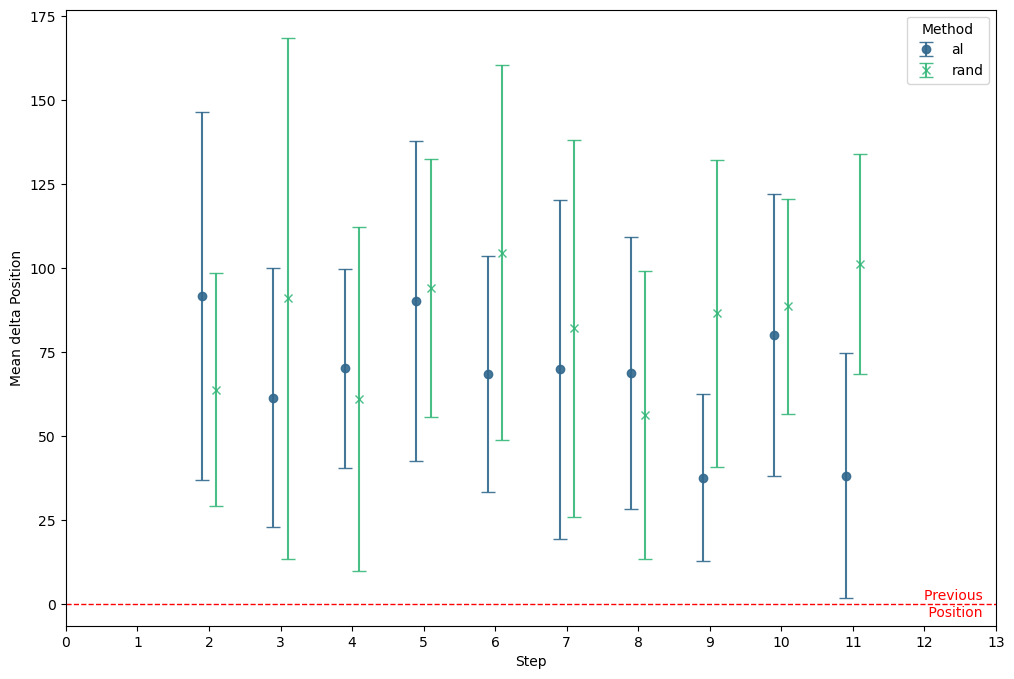

In [22]:
import seaborn as sns
offsets = np.linspace(-0.1, 0.1, 2)
plt.figure(figsize=(12, 8))
palette = sns.color_palette("viridis", 2)
first = True
for k,v in al_data.items():
    x_offset = k + offsets[0]
    plt.errorbar(
        x_offset,
        np.mean(al_data[k]),
        yerr=np.std(al_data[k]),
        fmt="o",
        color=palette[0],
        capsize=5,
        alpha=0.9,
        label = "al" if first else ""
    )
    x_offset = k + offsets[1]
    plt.errorbar(
        x_offset,
        np.mean(rand_data[k]),
        yerr=np.std(rand_data[k]),
        fmt="x",
        color=palette[1],
        capsize=5,
        alpha=0.9,
        label = "rand" if first else ""
    )
    first = False
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.text(list(al_data.keys())[-1] + 1, 0, "Previous \n Position", color="red", verticalalignment="center")

plt.xlabel("Step")
plt.ylabel("Mean delta Position")

plt.xticks(steps)  # Set x-ticks to steps
plt.legend(title="Method", loc='best')

In [23]:
label_path = "../../confluence-results/final-results/R1/AGGREGATED_RESTULTS/cp-al-goal-dep-enhanced-errorbars.pkl"
with open(label_path, "rb") as f:
    label_data = pickle.load(f)

ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'

In [26]:
import pandas.core.indexes.numeric

ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'

In [30]:
merged_df = pd.read_pickle(label_path)

In [29]:
df

gt_confluence_mean  pred_confluence_mean  relative_delta_confluence_mean  \
1             0.269277              0.355320                        0.336509   
3             0.269277              0.279899                        0.156748   
5             0.269277              0.309771                        0.156715   
6             0.269277              0.250709                        0.113556   
8             0.269277              0.267300                        0.071382   
11            0.269277              0.227601                        0.160497   
12            0.269277              0.243280                        0.116827   
15            0.269277              0.203825                        0.241550   
16            0.269277              0.183079                        0.319002   
19            0.269277              0.185725                        0.308766   
21            0.269277              0.194838                        0.274981   
22            0.269277              0.176338                        0.343960   
24            0.269277              0.192892                        0.281983   
27            0.269277              0.198650                        0.259955   
1             0.354963              0.386045                        0.169495   
2             0.354963              0.357163                        0.119760   
4             0.354963              0.354129                        0.092725   
6             0.354963              0.339572                        0.065460   
9             0.354963              0.337364                        0.081949   
11            0.354963              0.325187                        0.098045   
12            0.354963              0.318799                        0.103225   
14            0.354963              0.284547                        0.198040   
16            0.354963              0.290605                        0.182510   
18            0.354963              0.274820                        0.226015   
20            0.354963              0.299636                        0.169749   
22            0.354963              0.275032                        0.225847   
25            0.354963              0.251922                        0.290424   
26            0.354963              0.274485                        0.233161   

    iou_mean  precision_mean  recall_mean   f1_mean  true_negative_mean  \
1   0.285001        0.392379     0.515200  0.443115           1263540.2   
3   0.261060        0.408604     0.424462  0.413116           1388847.5   
5   0.285956        0.416192     0.478363  0.444657           1351105.0   
6   0.250302        0.417518     0.387124  0.400211           1435874.9   
8   0.267890        0.424818     0.421292  0.422494           1417711.6   
11  0.247632        0.433746     0.366726  0.396645           1479165.4   
12  0.251526        0.425084     0.383444  0.401628           1451695.9   
15  0.228537        0.431872     0.327233  0.371727           1511463.0   
16  0.213469        0.435577     0.296015  0.351568           1541788.1   
19  0.215678        0.435568     0.300376  0.354433           1538172.4   
21  0.230336        0.446582     0.323265  0.374022           1530924.2   
22  0.213057        0.444616     0.291227  0.350931           1555186.5   
24  0.233955        0.455587     0.325938  0.378934           1537474.2   
27  0.233700        0.447020     0.329725  0.378533           1525829.1   
1   0.467448        0.614702     0.665230  0.635298           1216819.2   
2   0.441493        0.615404     0.614740  0.612083           1243754.1   
4   0.438255        0.613706     0.607330  0.608704           1244746.9   
6   0.429757        0.614600     0.587815  0.600000           1263498.2   
9   0.457119        0.644469     0.611618  0.626338           1289688.2   
11  0.461685        0.662272     0.605357  0.631367           1314153.8   
12  0.449921        0.657960     0.589262  0.620434           1315813.2   
14  0.423221        0.669707     

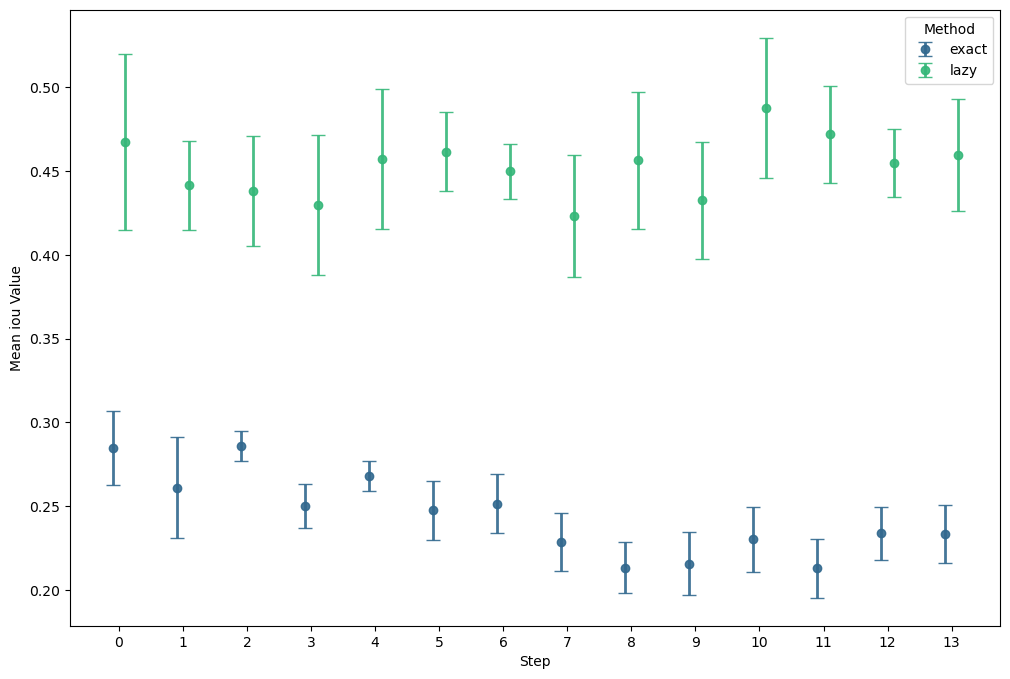

In [31]:
import numpy as np
metrics = ["iou"]
for metric in metrics:
    plt.figure(figsize=(12, 8))

    # Calculate unique steps and methods
    steps = merged_df['step'].unique()
    methods = merged_df['label'].unique()

    # Assign colors to each method
    palette = sns.color_palette("viridis", len(methods))

    # Create a plot
    for i, method in enumerate(methods):
        df_method = merged_df[merged_df['label'] == method]
        offsets = np.linspace(-0.1, 0.1, len(methods))
        marker = "o"
        if method == "al":
            marker = "x"
        for j, step in enumerate(steps):
            x_offset = step + offsets[i]
            y_mean = df_method[df_method['step'] == step][f"{metric}_mean"].values[0]
            y_std = df_method[df_method['step'] == step][f"{metric}_std"].values[0]
            
            plt.errorbar(
                x_offset, y_mean,
                yerr=y_std,
                fmt=marker,
                color=palette[i],
                elinewidth=2,
                capsize=5,
                alpha=0.9,
                label=f'{method}' if j == 0 else ""
            )

    # Customize the plot
    plt.xlabel("Step")
    plt.ylabel(f"Mean {metric} Value")
    plt.xticks(steps)  # Set x-ticks to steps
    plt.legend(title="Method", loc='best')

In [3]:
os.chdir("../..")
os.getcwd()

'/home/sc.uni-leipzig.de/me792rqay/development'

In [4]:
result_base_dir = "results_normal"
folders = [
    os.path.join("confluence", result_base_dir),
    os.path.join("confluence-sam", result_base_dir),
    os.path.join("confluence-unet", result_base_dir),
]


res_dict = {
    "model(col)": [],
    "data(group)": [],
    "iou": [],
    "relDelConf": [],
    "absDelConf": [],
    "absabsDelConf": [],
    "iou_std": [],
    "relDelConf_std": [],
    "absDelConf_std": [],
    "absabsDelConf_std": [],
}
print("folders", folders)
for subfolder in folders:
    print(subfolder)
    subfolders = os.listdir(subfolder)
    print(f'len subfolders before filter: {len(subfolders)}')
    subfolders = [f for f in subfolders if "." not in f]
    print(f'len subfolders after filter: {len(subfolders)}')
    for f in subfolders:
        print(f"folder: {f}")
        df = pd.read_csv(os.path.join(subfolder, f, "eval_metrics.csv"))
        model_name = f.split("-")[0]
        dataset_name = f.replace(model_name, "").replace("_normal", "")
        res_dict["data(group)"].append(dataset_name)
        res_dict["model(col)"].append(model_name)

        df["absDelConf"] = df["gt_confluence"] - df["pred_confluence"]
        df["absabsDelConf"] = abs(df["gt_confluence"] - df["pred_confluence"])
        last_row = df.iloc[-1]
        res_dict["iou"].append(last_row["iou"])
        res_dict["relDelConf"].append(last_row["relative_delta_confluence"])
        res_dict["absDelConf"].append(last_row["absDelConf"])
        res_dict["absabsDelConf"].append(last_row["absabsDelConf"])
        # get standard deviation of iou, relDelConf, absDelConf
        res_dict["iou_std"].append(df["iou"].std())
        res_dict["relDelConf_std"].append(df["relative_delta_confluence"].std())
        res_dict["absDelConf_std"].append(df["absDelConf"].std())
        res_dict["absabsDelConf_std"].append(df["absabsDelConf"].std())


folders ['confluence/results_normal', 'confluence-sam/results_normal', 'confluence-unet/results_normal']
confluence/results_normal
len subfolders before filter: 12
len subfolders after filter: 12
folder: cp-sc_normal
folder: d2-lc-internallazy_normal
folder: base-sc_normal
folder: base-lc-internallazy_normal
folder: cp-lc-external_normal
folder: d2-lc-internal_normal
folder: base-lc-internal_normal
folder: cp-lc-internal_normal
folder: d2-lc-external_normal
folder: d2-sc_normal
folder: base-lc-external_normal
folder: cp-lc-internallazy_normal
confluence-sam/results_normal
len subfolders before filter: 3
len subfolders after filter: 3
folder: sam-sc_normal
folder: sam-lc-internal_normal
folder: sam-lc-internallazy_normal
confluence-unet/results_normal
len subfolders before filter: 4
len subfolders after filter: 4
folder: unet-lc-internal_normal
folder: unet-sc_normal
folder: unet-lc-external_normal
folder: unet-lc-internallazy_normal


In [5]:
res_df = pd.DataFrame(res_dict)
res_df = res_df.sort_values(by="model(col)")

In [6]:
res_df

model(col)       data(group)       iou  relDelConf  absDelConf  \
2        base               -sc  0.203631    0.714888    0.104908   
3        base  -lc-internallazy  0.088637    0.891331    0.316288   
10       base      -lc-external  0.109360    0.857830    0.510342   
6        base      -lc-internal  0.056019    0.861205    0.232162   
0          cp               -sc  0.070937    0.841393    0.130332   
11         cp  -lc-internallazy  0.082506    0.904260    0.320925   
4          cp      -lc-external  0.685861    0.181626    0.102468   
7          cp      -lc-internal  0.014998    0.960749    0.258798   
9          d2               -sc  0.499510    0.282600    0.043158   
5          d2      -lc-internal  0.285620    0.225186    0.061130   
1          d2  -lc-internallazy  0.591690    0.166400    0.058892   
8          d2      -lc-external  0.488945    0.368111    0.274555   
12        sam               -sc  0.874590    0.057500    0.007954   
13        sam      -lc-internal  0.459712    0.096580   -0.025501   
14        sam  -lc-internallazy  0.936610    0.036434   -0.012917   
17       unet      -lc-external  0.079478    0.857234    0.519669   
15       unet      -lc-internal  0.349073    0.552856   -0.147733   
16       unet               -sc  0.238098    0.452097    0.056312   
18       unet  -lc-internallazy  0.507233    0.719614   -0.254949   

    absabsDelConf   iou_std  relDelConf_std  absDelConf_std  absabsDelConf_std  
2        0.104908  0.026684        0.089110        0.028941           0.028941  
3        0.316288  0.006452        0.009078        0.006707           0.006707  
10       0.510342  0.071773        0.077029        0.256490           0.256490  
6        0.232162  0.017810        0.024682        0.015710           0.015710  
0        0.130332  0.041204        0.077685        0.050996           0.050996  
11       0.320925  0.002144        0.004795        0.008371           0.008371  
4        0.102468  0.031082        0.069433        0.093669           0.079003  
7        0.258798  0.003323        0.008603        0.012428           0.012428  
9        0.043158  0.014417        0.028940        0.015454           0.015454  
5        0.061130  0.160822        0.046834        0.014981           0.014981  
1        0.058892  0.013558        0.015575        0.003675           0.003675  
8        0.274555  0.202453        0.238501        0.234958           0.234133  
12       0.007954  0.004145        0.046559        0.007586           0.007586  
13       0.025501  0.372404        0.048001        0.011909           0.011909  
14       0.012917  0.001900        0.001432        0.000103           0.000103  
17       0.519669  0.092079        0.142074        0.266676           0.266676  
15       0.147733  0.145550        0.108114        0.023294           0.023294  
16       0.056312  0.114994        0.316557        0.046012           0.046012  
18       0.254949  0.006062        0.043685        0.007491           0.007491

In [24]:
yerrs.values.tolist()

[0.026684184329635527,
 0.006452430750046121,
 0.07177321690323304,
 0.017810497228080285]

i: 0, "model_name: base
i: 1, "model_name: cp
i: 2, "model_name: d2
i: 3, "model_name: sam
i: 4, "model_name: unet


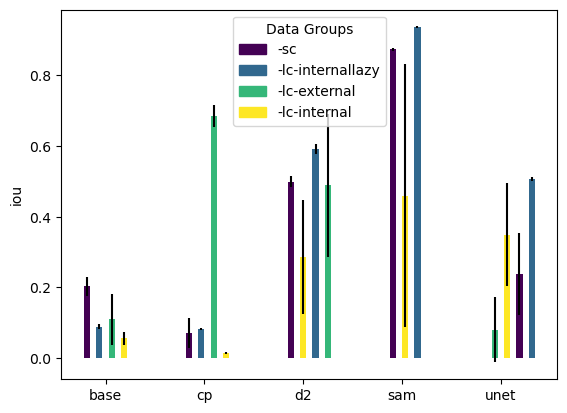

i: 0, "model_name: base
i: 1, "model_name: cp
i: 2, "model_name: d2
i: 3, "model_name: sam
i: 4, "model_name: unet


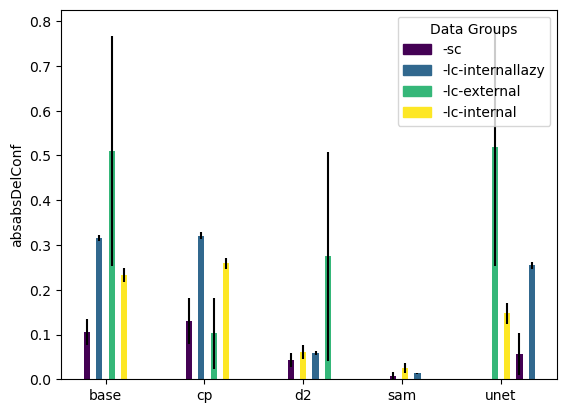

i: 0, "model_name: base
i: 1, "model_name: cp
i: 2, "model_name: d2
i: 3, "model_name: sam
i: 4, "model_name: unet


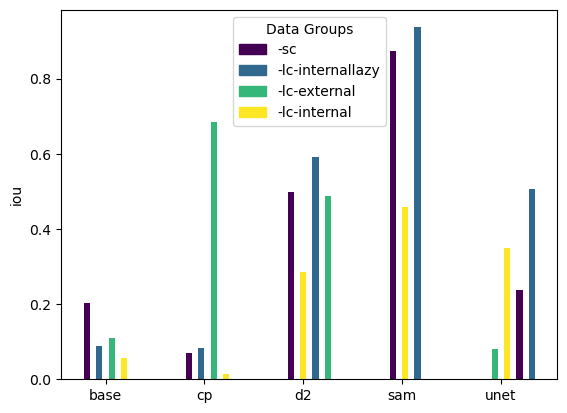

i: 0, "model_name: base
i: 1, "model_name: cp
i: 2, "model_name: d2
i: 3, "model_name: sam
i: 4, "model_name: unet


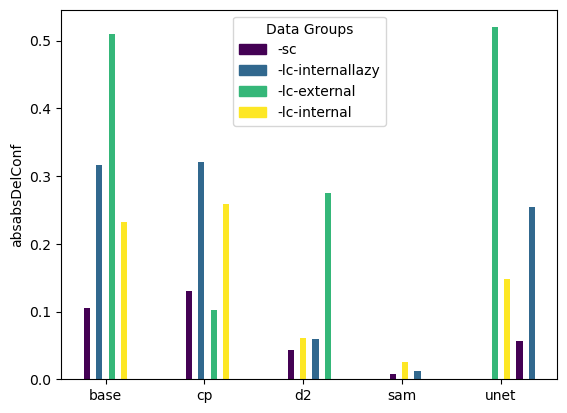

In [38]:
import matplotlib.cm as cm
import numpy as np


def plot_bars(res_df, respath, plot_errorbars=True):
    data_names = res_df["data(group)"].unique()
    model_names = res_df["model(col)"].unique()
    metrics = ["iou", "absabsDelConf"]
    offset = 0

    for metric in metrics:
        cmap = cm.get_cmap('viridis', len(data_names))
        group_colors = {group: cmap(i / len(data_names)) for i, group in enumerate(data_names)}

        models = []
        barWidth = 0.5
        offset = 0

        for i, model_name in enumerate(model_names):
            print(f'i: {i}, "model_name: {model_name}')
            models.append(model_name)

            bars = res_df[res_df["model(col)"] == model_name][metric]
            yerrs = res_df[res_df["model(col)"]==model_name][f"{metric}_std"]
            yerrs = yerrs.values.tolist()
            if not plot_errorbars:
                yerrs = [None for _ in range(len(yerrs))]
            groups = res_df[res_df["model(col)"] == model_name]["data(group)"]
            r = np.arange(len(bars))
            for j, (bar, group) in enumerate(zip(bars, groups)):
                plt.bar(r[j] + i * 0.5 * barWidth + offset, bar, color=group_colors[group], width=barWidth, yerr=yerrs[j])

            offset +=8

        plt.xticks(
            [1.5,9.5,17.5,25.5, 33.5], models
        )
        # Create a legend for the data groups
        handles = [plt.Rectangle((0, 0), 1, 1, color=group_colors[group]) for group in data_names]
        plt.legend(handles, data_names, title="Data Groups")
        plt.ylabel(metric)
        plt.show()
        plt.tight_layout()  # Adjust layout to fit labels and legend
        plt.savefig(os.path.join(respath, f"{plot_col}_by_model_and_data_wError.png"))
        plt.close()
plot_bars(res_df,"")
plot_bars(res_df, "", False)


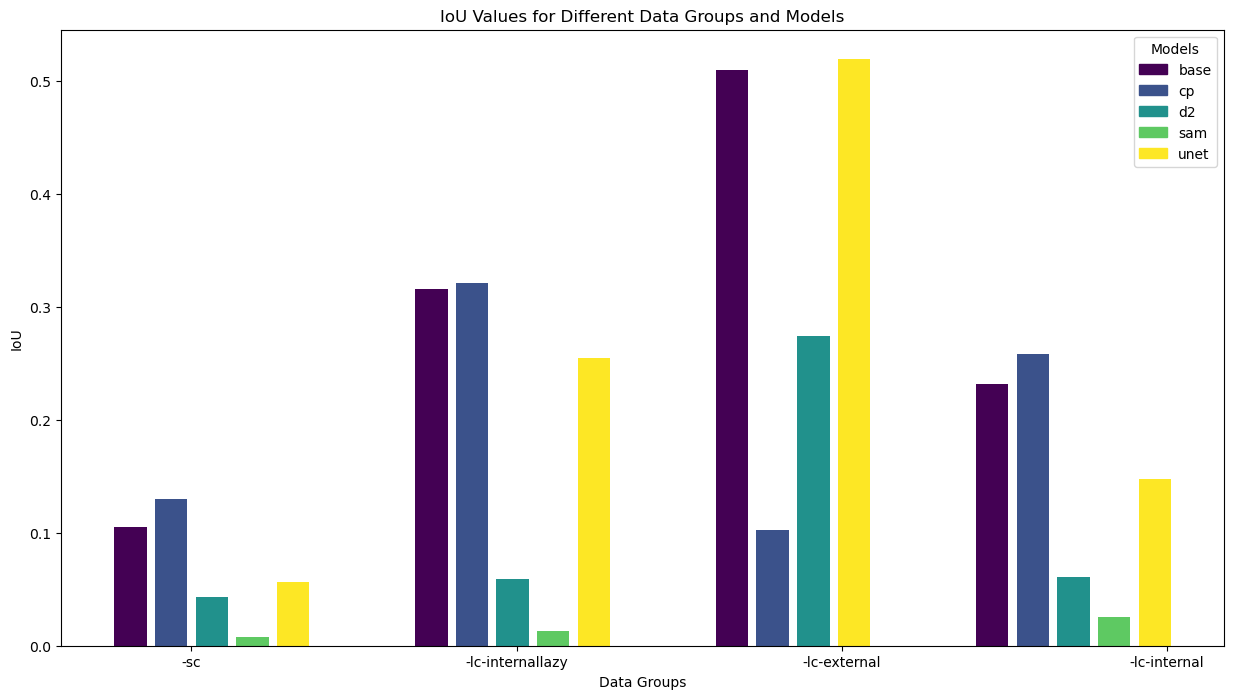

In [39]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Sample DataFrame
import pandas as pd

data_names = res_df["data(group)"].unique()
model_names = res_df["model(col)"].unique()

# Define plot column and bar width
metrics = ["iou", "absabsDelConf"]
barWidth = 0.8
offset = 0

# Get colormap with enough colors for models
cmap = cm.get_cmap('viridis', len(model_names))
model_colors = {model: cmap(i / len(model_names)) for i, model in enumerate(model_names)}

# Set figure size
plt.figure(figsize=(15, 8))
names = []
# Iterate through data groups and plot bars
for i, data_name in enumerate(data_names):
    names.append(data_name)
    bars = res_df[res_df["data(group)"] == data_name][metric]
    models = res_df[res_df["data(group)"] == data_name]["model(col)"]
    r = np.arange(len(bars))
    
    for j, (bar, model) in enumerate(zip(bars, models)):
        plt.bar(r[j] + i * 0.5 * barWidth + offset, bar, color=model_colors[model], width=barWidth)
    
    offset += len(bars) + 2  # Add space for the next set of bars

plt.xticks(
    [1.5,9.5,17.5,25.5], names
)
# Create a legend for the models
handles = [plt.Rectangle((0, 0), 1, 1, color=model_colors[model]) for model in model_names]
plt.legend(handles, model_names, title="Models")

# Add labels and title
plt.xlabel("Data Groups")
plt.ylabel("IoU")
plt.title("IoU Values for Different Data Groups and Models")

# Show plot
plt.show()


In [88]:
[r + barWidth * (len(data_groups) - 1) * 10/ 2 for r in range(len(models))]

[1.5000000000000002, 2.5, 3.5, 4.5, 5.5]

In [90]:
[r + barWidth * 4 *20 for r in range(len(models))]

[8.0, 9.0, 10.0, 11.0, 12.0]